6. Object detection using Transfer Learning of CNN architectures
<br>
a. Load in a pre-trained CNN model trained on a large dataset
<br>
b. Freeze parameters (weights) in model’s lower convolutional layers
<br>
c. Add custom classifier with several layers of trainable parameters to model
<br>
d. Train classifier layers on training data available for task
<br>
e. Fine-tune hyper parameters and unfreeze more layers as needed

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Pre processing img data 

In [6]:
dataset_dir = "C:\\Users\\swapn\\Desktop\\caltech-101\\caltech-101\\101_ObjectCategories\\101_ObjectCategories"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


#### Selecting first batch containing 2000 images as train and second batch containing 2000 images as test data

In [7]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


#### a. Load in a pre-trained CNN model trained on a large dataset

In [9]:
# Load VGG16 without top layers
weights_path = "C:\\Users\\swapn\\Desktop\\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

#### b. Freeze parameters (weights) in model’s lower convolutional layers

In [10]:
for layer in base_model.layers:
   layer.trainable = False

#### c. Add custom classifier with several layers of trainable parameters to model

In [11]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

#### d. Train classifier layers on training data available for task

In [12]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 58s 2s/step - loss: 3.9413 - accuracy: 0.1745 - val_loss: 3.3885 - val_accuracy: 0.2905
Epoch 2/10
32/32 [==============================] - 34s 1s/step - loss: 3.0589 - accuracy: 0.3465 - val_loss: 2.9787 - val_accuracy: 0.3885
Epoch 3/10
32/32 [==============================] - 36s 1s/step - loss: 2.5635 - accuracy: 0.4470 - val_loss: 2.6377 - val_accuracy: 0.4510
Epoch 4/10
32/32 [==============================] - 39s 1s/step - loss: 2.1463 - accuracy: 0.5360 - val_loss: 2.3988 - val_accuracy: 0.4960
Epoch 5/10
32/32 [==============================] - 41s 1s/step - loss: 1.8361 - accuracy: 0.5955 - val_loss: 2.2339 - val_accuracy: 0.5155
Epoch 6/10
32/32 [==============================] - 41s 1s/step - loss: 1.5915 - accuracy: 0.6560 - val_loss: 2.1010 - val_accuracy: 0.5395
Epoch 7/10
32/32 [==============================] - 42s 1s/step - loss: 1.4001 - accuracy: 0.6965 - val_loss: 2.0050 - val_accuracy: 0.5530
Epoch 8/10
32/32 [==

#### e. Fine-tune hyper parameters and unfreeze more layers as needed

In [13]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 36s 1s/step - loss: 3.0579 - accuracy: 0.3730 - val_loss: 2.3039 - val_accuracy: 0.4850
Epoch 2/10
32/32 [==============================] - 43s 1s/step - loss: 1.7377 - accuracy: 0.5810 - val_loss: 1.9004 - val_accuracy: 0.5550
Epoch 3/10
32/32 [==============================] - 43s 1s/step - loss: 1.1640 - accuracy: 0.6885 - val_loss: 1.6846 - val_accuracy: 0.6035
Epoch 4/10
32/32 [==============================] - 44s 1s/step - loss: 0.7321 - accuracy: 0.7980 - val_loss: 1.6753 - val_accuracy: 0.6235
Epoch 5/10
32/32 [==============================] - 44s 1s/step - loss: 0.4734 - accuracy: 0.8670 - val_loss: 1.7102 - val_accuracy: 0.6245
Epoch 6/10
32/32 [==============================] - 44s 1s/step - loss: 0.2408 - accuracy: 0.9350 - val_loss: 1.6814 - val_accuracy: 0.6485
Epoch 7/10
32/32 [==============================] - 44s 1s/step - loss: 0.1532 - accuracy: 0.9615 - val_loss: 1.7136 - val_accuracy: 0.6460
Epoch 8/10
32/32 [==

In [14]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 [==============================] - 18s 282ms/step


In [15]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  llama
Actual:  crocodile


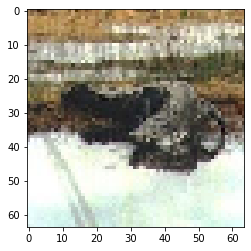

In [17]:
n = 1000
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])